In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [43]:
cols=['ID', 'Topic', 'Sentiment', 'Text']
train = pd.read_csv("twitter_training.csv",names=cols)

In [44]:
train.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [45]:
train.shape

(74682, 4)

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [47]:
train.describe(include=object)

,Topic,Sentiment,Text
count,74682,74682,73996
unique,32,4,69491
top,Microsoft,Negative,
freq,2400,22542,172


In [48]:
train['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [49]:
train.isnull().sum()

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [50]:
train.dropna(inplace=True)

In [51]:
train.isnull().sum()

ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

In [52]:
train.duplicated().sum()

np.int64(2340)

In [53]:
train.drop_duplicates(inplace=True)

In [54]:
train.duplicated().sum()

np.int64(0)

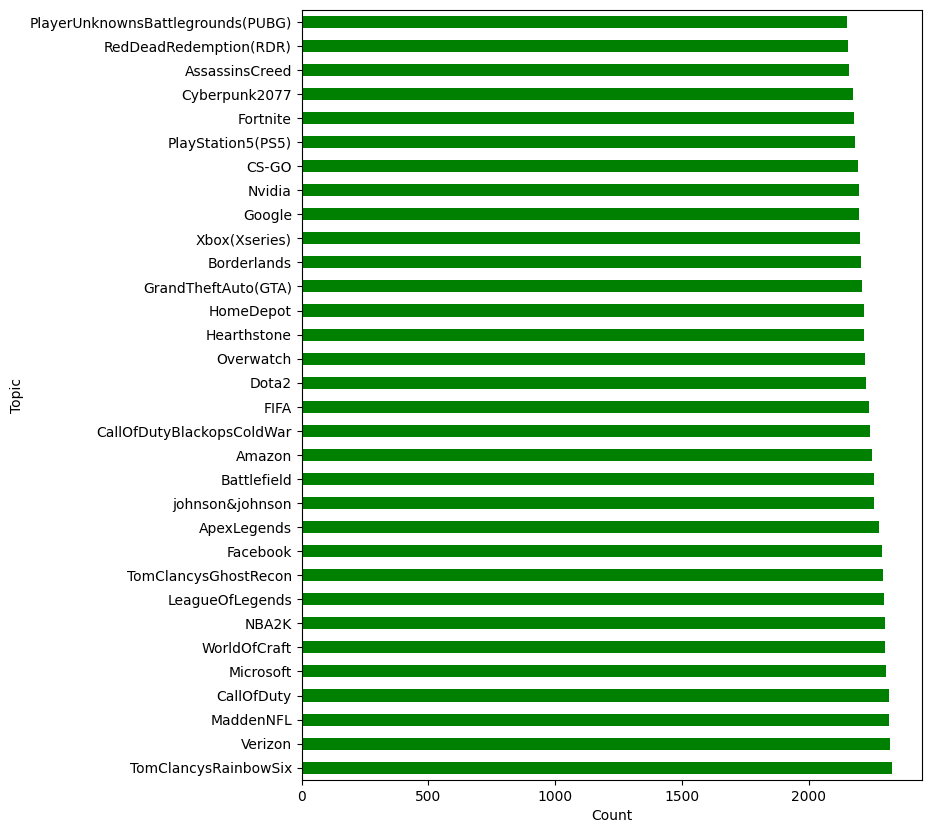

In [55]:
plt.figure(figsize=(8,10))
train['Topic'].value_counts().plot(kind='barh',color='g')
plt.xlabel("Count")
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_4948\3411538062.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Sentiment',data=train,palette='viridis')


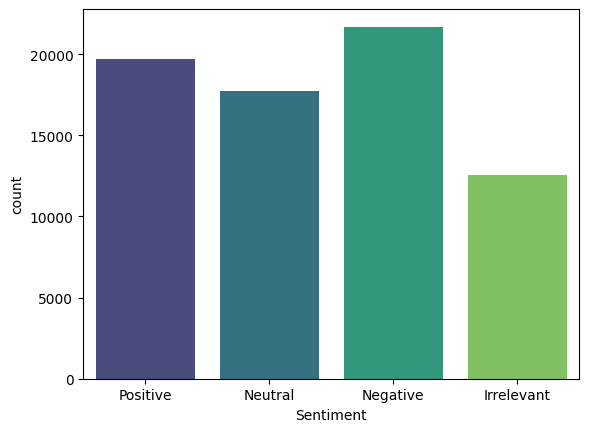

In [56]:
sns.countplot(x = 'Sentiment',data=train,palette='viridis')
plt.show()

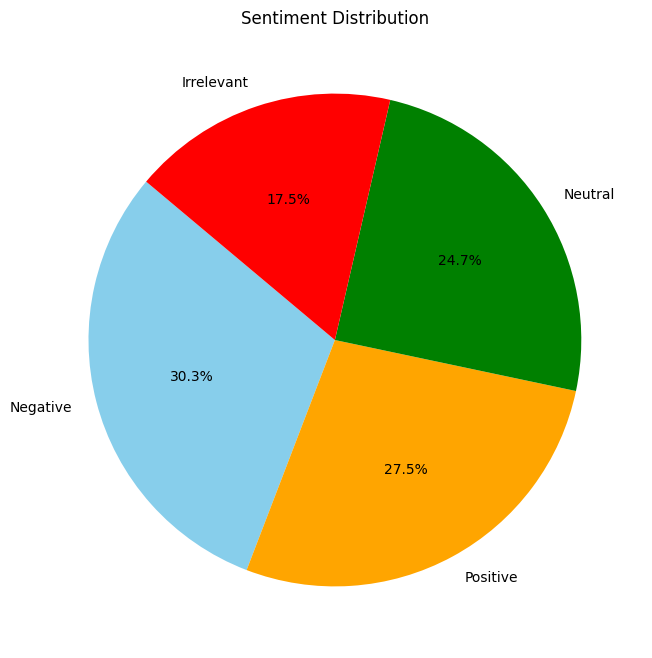

In [57]:
# Calculate the counts for each sentiment
sentiment_counts = train['Sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])

plt.title('Sentiment Distribution')

# Show the plot
plt.show()


`Observation:`
- Most topic has negative sentiment 

In [58]:
train

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


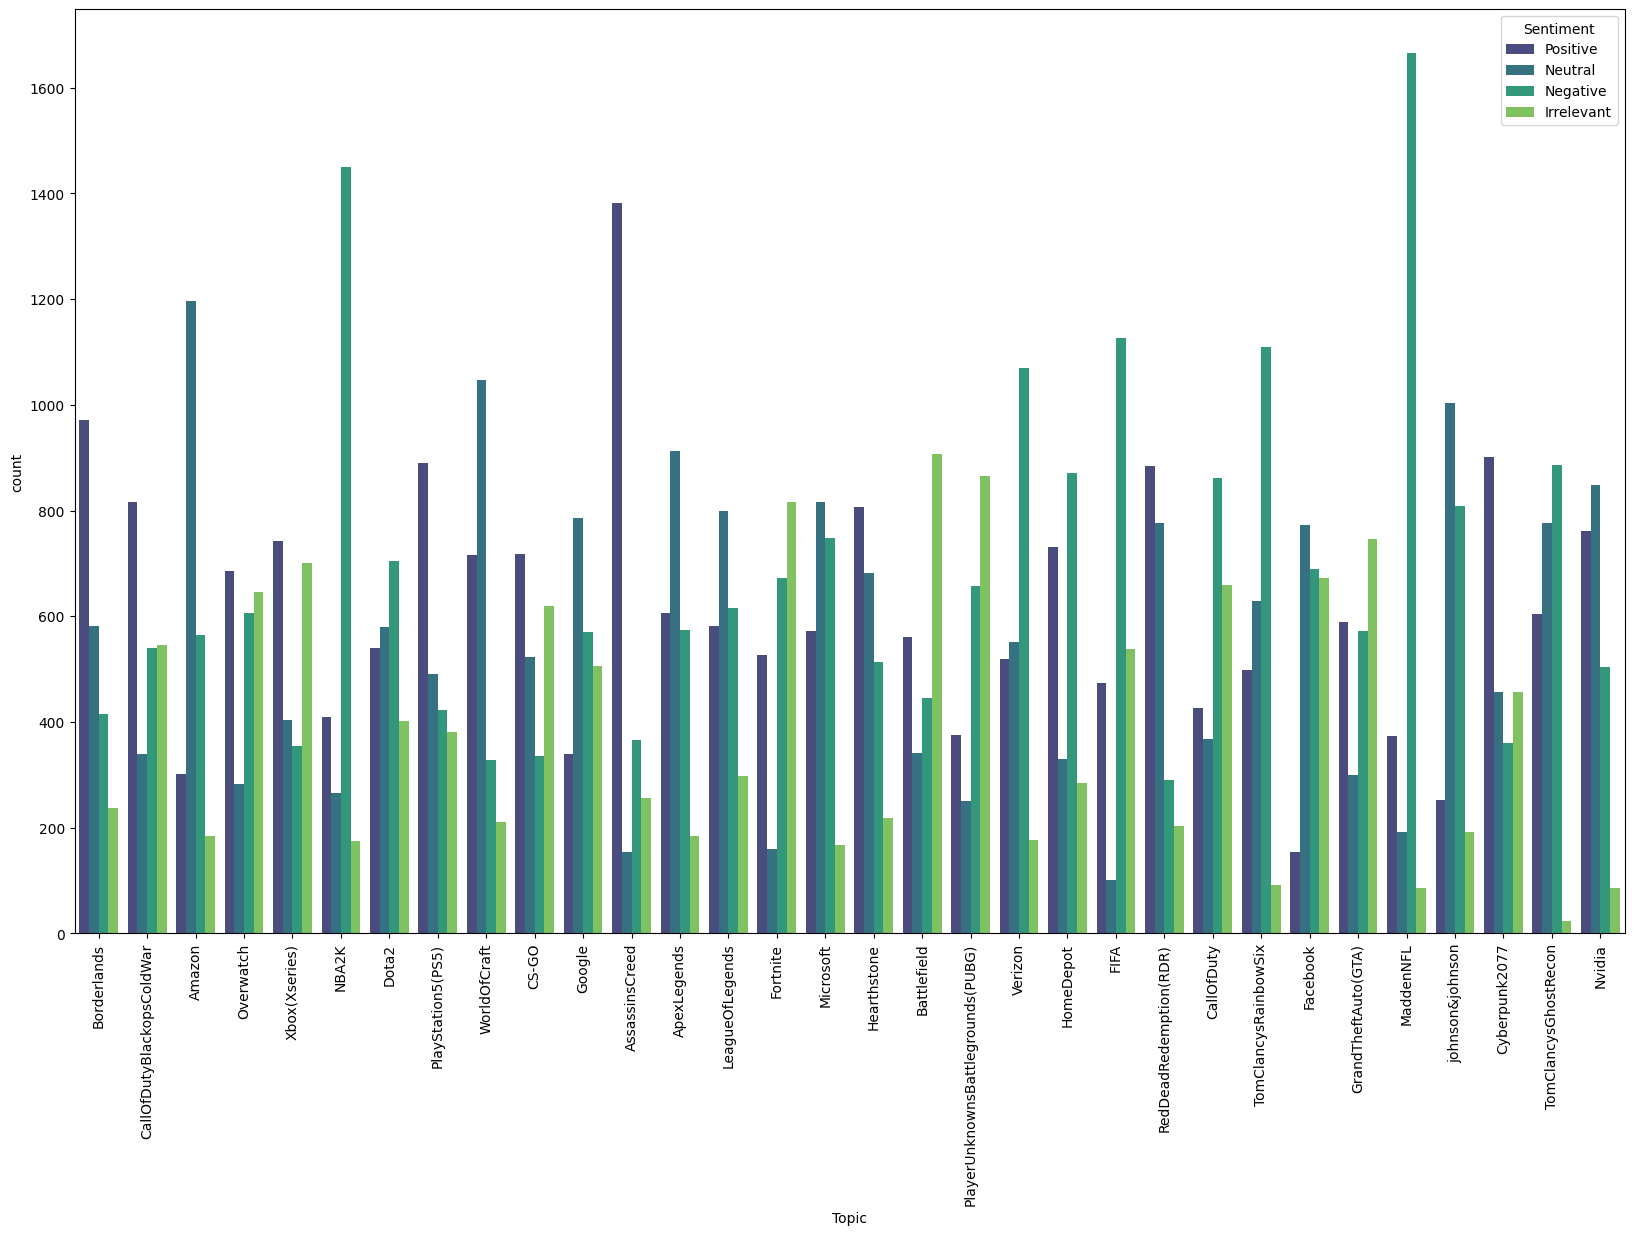

In [59]:
plt.figure(figsize=(20,12))
sns.countplot(x='Topic',data=train,palette='viridis',hue='Sentiment')
plt.xticks(rotation=90)
plt.show()

In [60]:
## Group by Topic and Sentiment
topic_wise_sentiment = train.groupby(["Topic", "Sentiment"]).size().reset_index(name='Count')

# Step 2: Select Top 5 Topics
topic_counts = train['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(topic_counts)]

C:\Users\dell\AppData\Local\Temp\ipykernel_4948\803790960.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Topic', y='Count', palette='viridis')


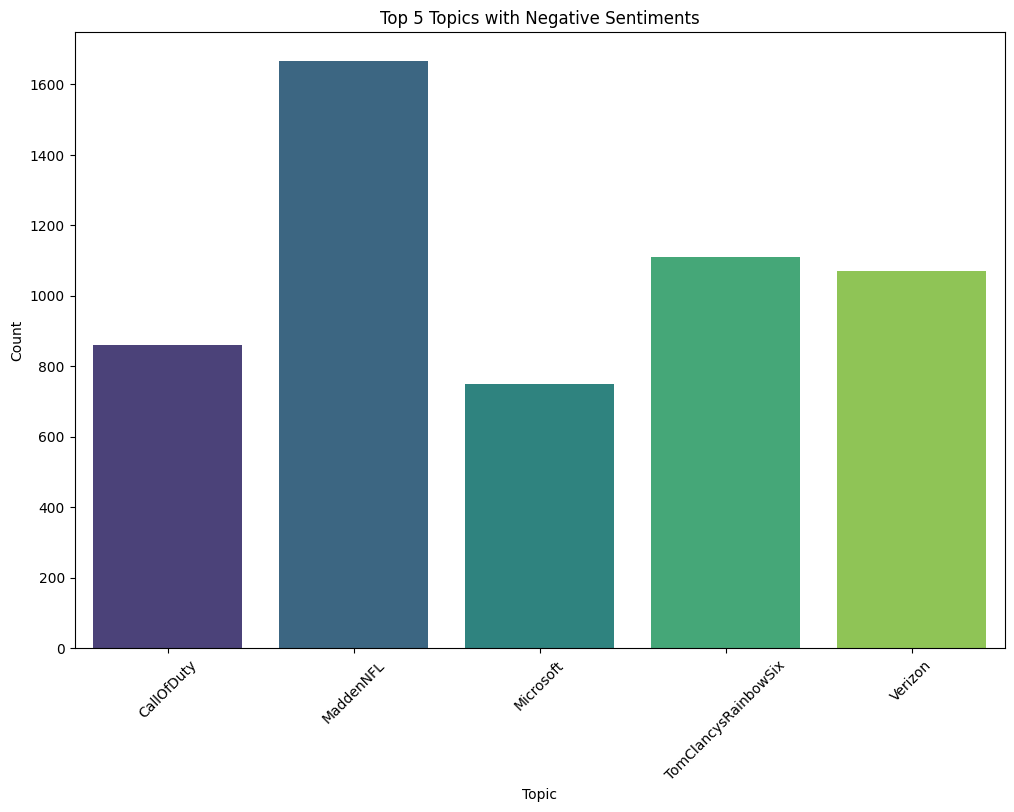

In [61]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Topic', y='Count', palette='viridis')
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_4948\2021425651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Topic', y='Count', palette='Greens')


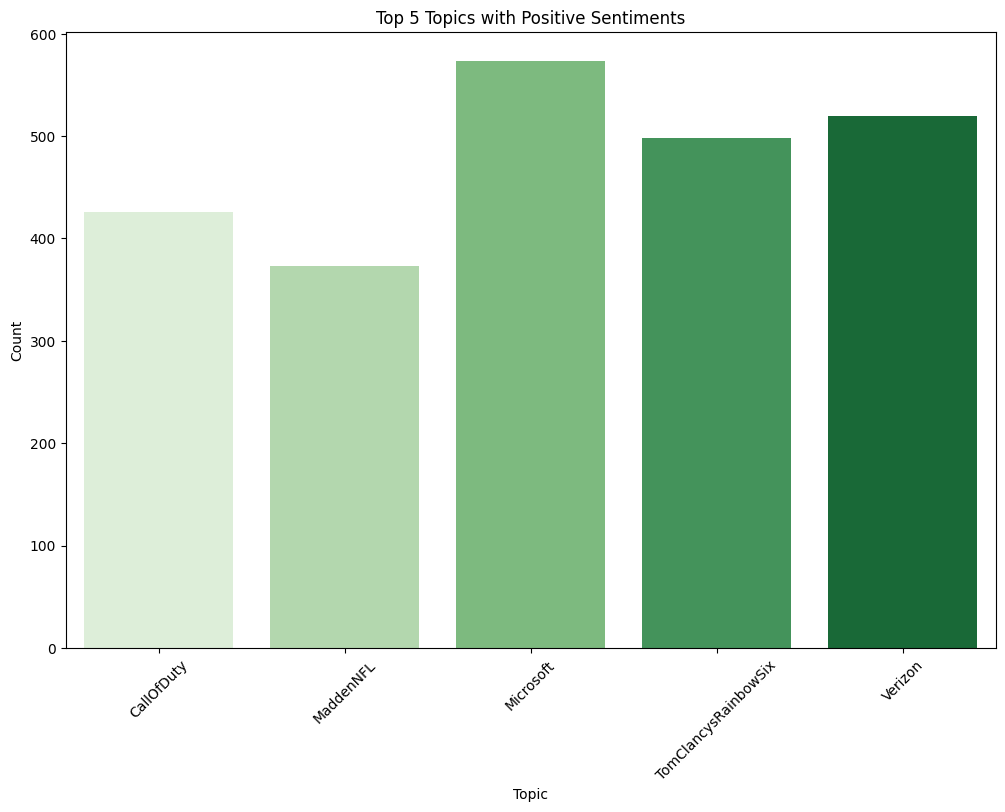

In [62]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Topic', y='Count', palette='Greens')
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_4948\250600727.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'],


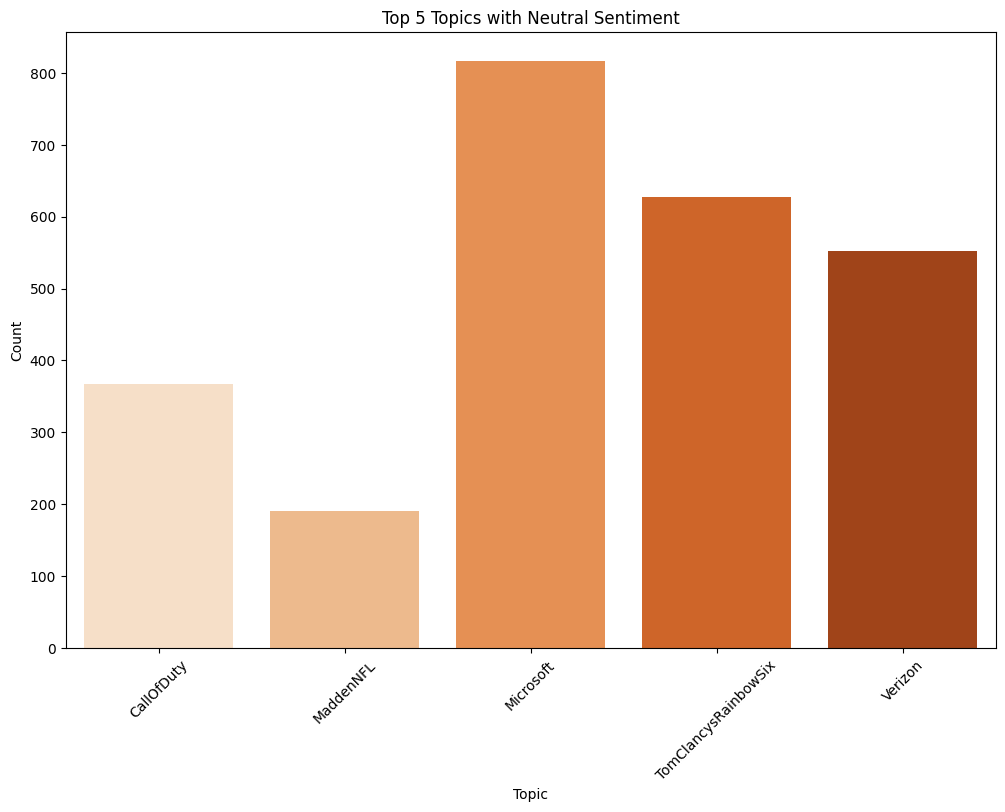

In [83]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Plot a bar chart for the top 5 topics with a neutral sentiment, using the 'Oranges' color palette
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], 
            x='Topic', y='Count', palette='Oranges')

# Customize the plot with a title and axis labels
plt.title('Top 5 Topics with Neutral Sentiment')
plt.xlabel('Topic')
plt.ylabel('Count')

# Rotate the x-axis labels for better visualization
plt.xticks(rotation=45)

# Display the chart
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_4948\1216577360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', palette='grey')


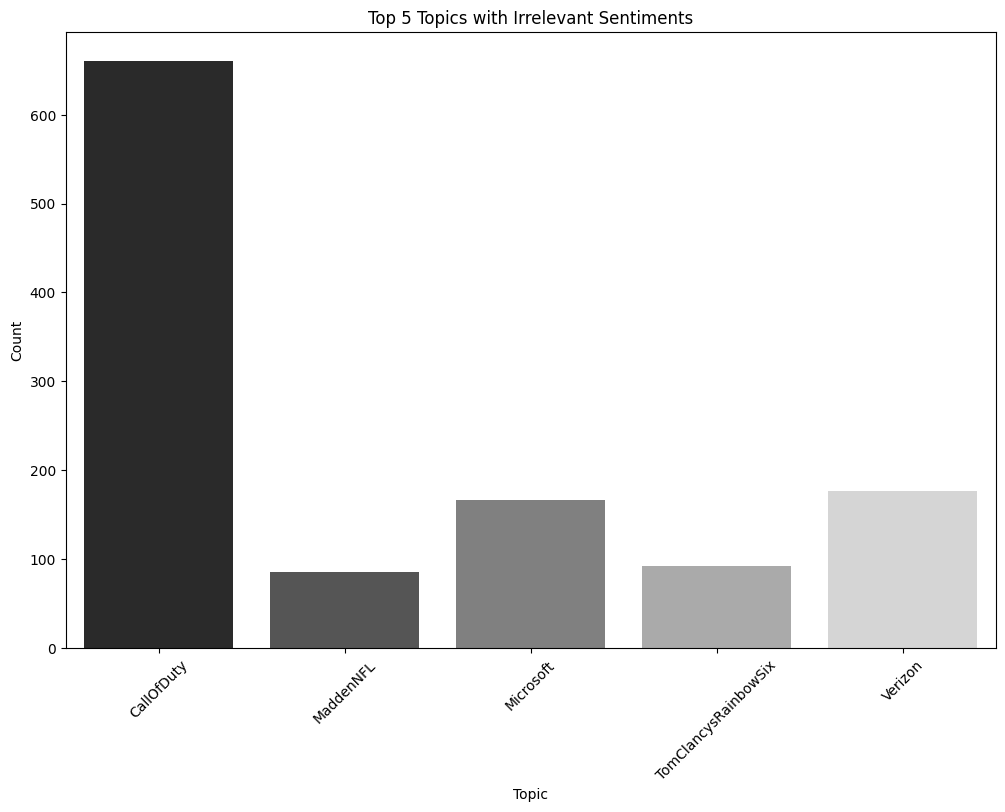

In [74]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', palette='grey')
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

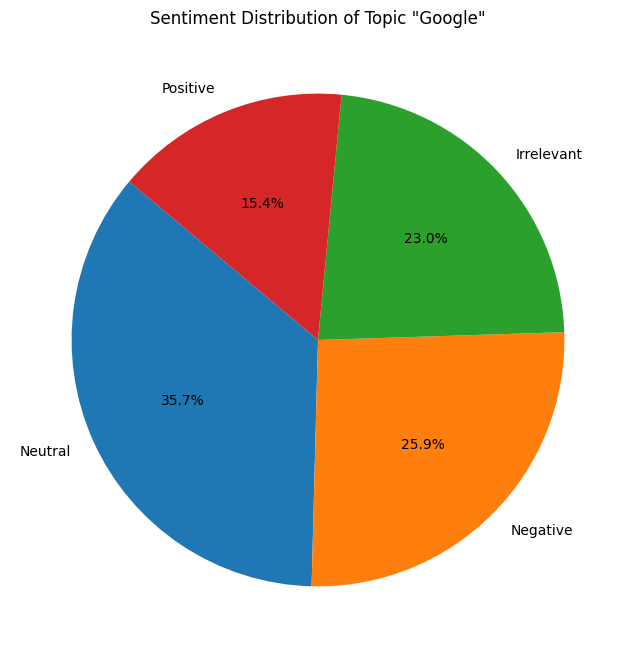

In [65]:
# Filter the dataset to include only entries related to the topic 'Google'
google_data = train[train['Topic'] == 'Google']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()


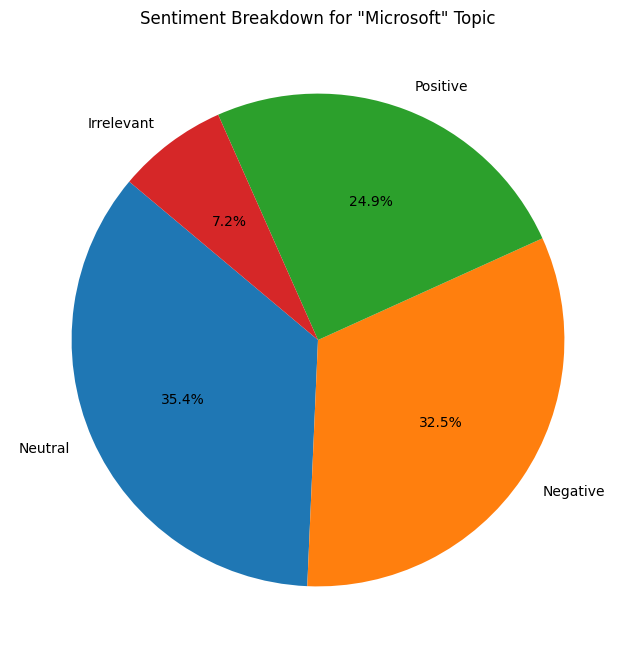

In [66]:
# Extract data pertaining to the 'Microsoft' topic from the dataset
microsoft_data = train[train['Topic'] == 'Microsoft']

# Calculate the frequency of each sentiment in the filtered data
sentiment_distribution = microsoft_data['Sentiment'].value_counts()

# Create and display a pie chart to visualize the sentiment distribution
plt.figure(figsize=(10, 8))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Breakdown for "Microsoft" Topic')
plt.show()


In [67]:
train['msg_len'] = train['Text'].apply(len)

In [68]:
train

,ID,Topic,Sentiment,Text,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,125
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,159


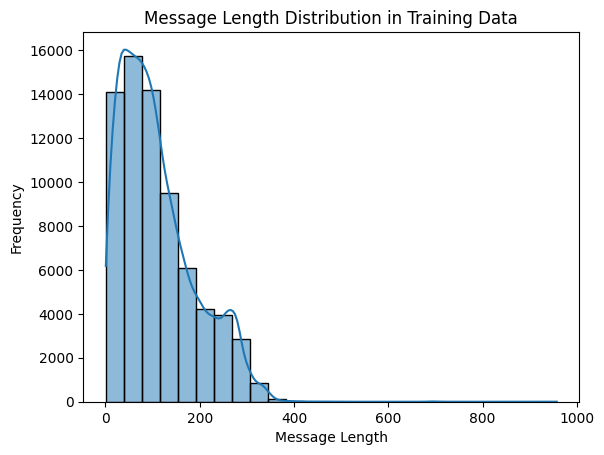

In [69]:
sns.histplot(train['msg_len'], bins=25,kde=True)
plt.title('Message Length Distribution in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_4948\3465750075.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='Sentiment', y='msg_len', palette='viridis',


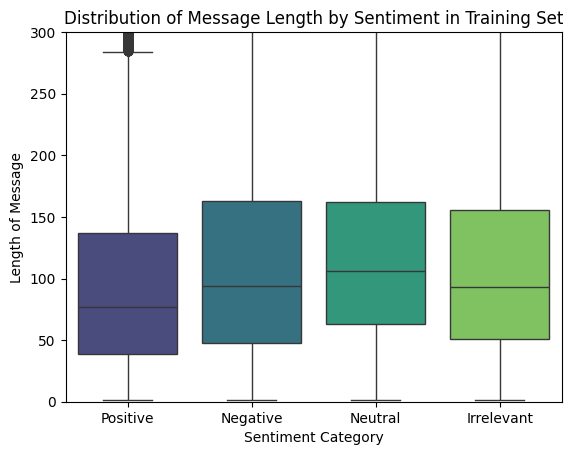

In [70]:
# Create a boxplot to analyze message length distribution across different sentiments
sns.boxplot(data=train, x='Sentiment', y='msg_len', palette='viridis', 
            order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])

# Customize the plot with a title and axis labels
plt.title('Distribution of Message Length by Sentiment in Training Set')
plt.ylabel('Length of Message')
plt.xlabel('Sentiment Category')
plt.ylim(0, 300)

# Display the boxplot
plt.show()
 

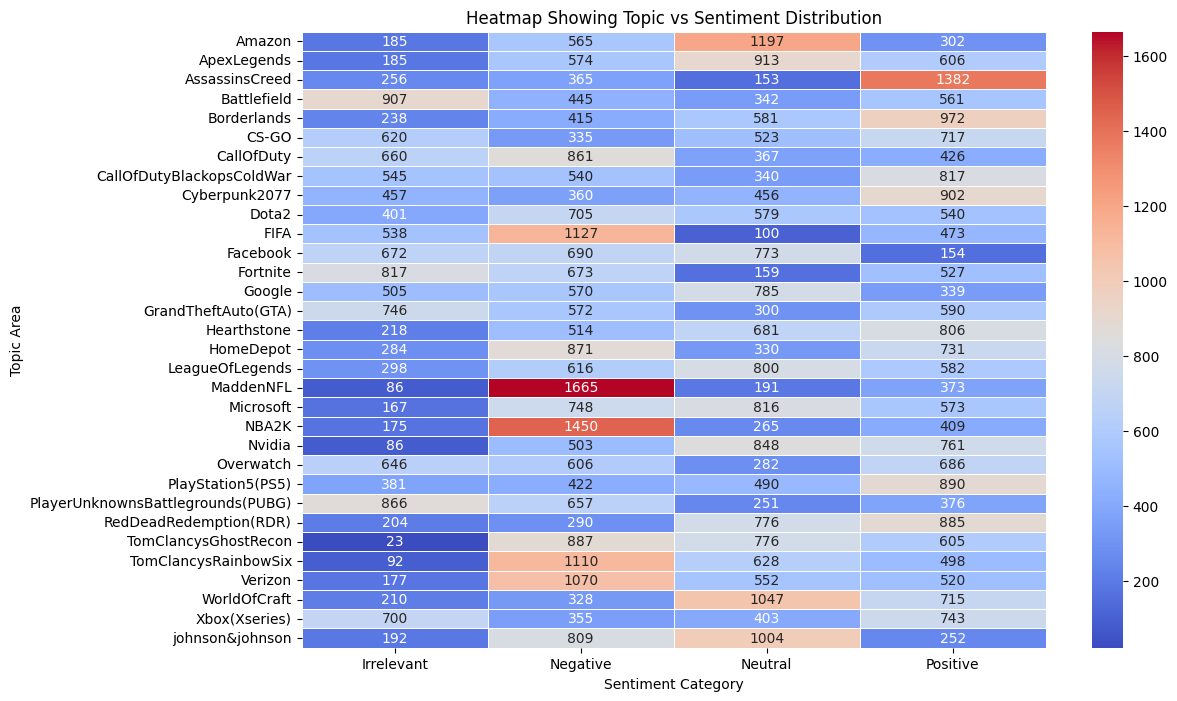

In [71]:
# Construct a contingency table to explore the relationship between 'Topic' and 'Sentiment'
contingency_table = pd.crosstab(index=train['Topic'], columns=train['Sentiment'])

# Generate a heatmap to visualize the data
plt.figure(figsize=(12, 8))  
sns.heatmap(contingency_table, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)

# Add labels and a title for clarity
plt.title('Heatmap Showing Topic vs Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Topic Area')

# Render the heatmap
plt.show()


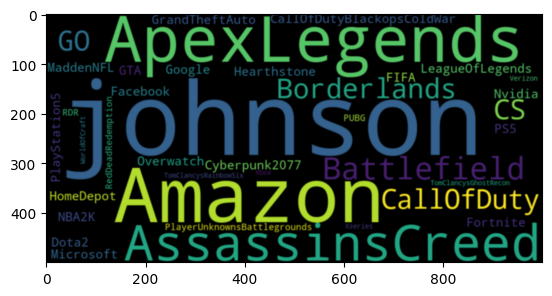

In [72]:
topic_list = ' '.join(crosstab.index)


wc = WordCloud(width=1000, height=500).generate(topic_list)

plt.imshow(wc, interpolation='bicubic')

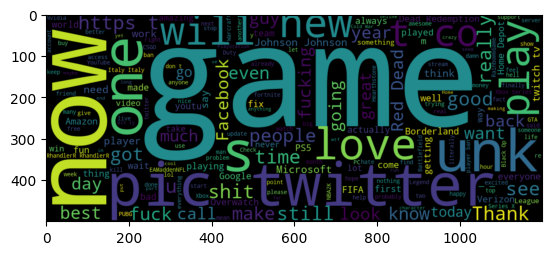

In [73]:
corpus = ' '.join(train['Text'])

wc2 = WordCloud(width=1200, height=500).generate(corpus)

plt.imshow(wc2, interpolation='bilinear')